<a href="https://colab.research.google.com/github/pkehinde55/US_Car_Accidents_Severity_Prediction/blob/main/US_Car_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Car Accident Severity Prediction Final Project


By: Arushi Srivastava, Patrick Kehinde, and Craig Lee

#Motivation

In this project, we take comprehensive data on millions of car accidents that occurred in the United States between February 2016 and December 2021. This dataset covers 49 states of the United States and was aggregated  using several data providers, including multiple APIs that provide streaming traffic event data. The link to this dataset can be found via this kaggle link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?datasetId=199387&searchQuery=weather


The main objective of the project is to predict the severity of car accidents with the knowledge of other factors. We want to see if we can build an ML model that properly classifies an accident to a certain severity level by using attributes such as time of day, location, weather, etc.

If this predictive model works, it can be used to make sure suffecient resources are sent to accident scenes and the victims are helped more effeciently. Instead of sending one police car, we may be able to gage you need a couple of police offices and maybe even an ambulance.

If we see that location is a key factor, it will suggest that more resources should be allocated near places that are at risk for high severity accidents.

We also do this project to explore how the severity of accidents differs across the country, how accidents are described, and how the distribution of severity has changed overtime.

What makes this project interesting is that we added features to the already huge dataset that we think could be very telling of the severity. We include many interesting visualizations such as geomaps, bar charts, histograms, etc to convey our findings.

#Imports

In [ ]:
# import packages
!pip install pandasql
!pip install sqlalchemy==1.4.46
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import re
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
import pandasql as ps #SQL on Pandas Dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Data Loading and Preprocessing

In this section we will load and preprocess the data. We saved the dataset as a csv on Google Drive and placed it in a Colab folder.

We will do some see how the original data set looks, general cleaning such as dropping null values, add features based on the pre-existing features, and cast existing features to types that will be more favorable for our analysis.

In [ ]:
# Download the US_Accidents_Dec21 from its public google drive link
! gdown --id 19xjOEFyRrw50MdmPwEEonT2-zdJfTFiz

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19xjOEFyRrw50MdmPwEEonT2-zdJfTFiz
To: /content/US_Accidents_Dec21_updated.csv
100% 1.15G/1.15G [00:12<00:00, 91.3MB/s]


In [ ]:
# Create a pandas df from the US_Accidents_Dec21_updated.csv source file
raw_car_accidents_df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [ ]:
# View how the original rows look
raw_car_accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# View the type of each column
raw_car_accidents_df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [ ]:
# Show the number of unique values in each column. Any column with just one value can be dropped
# because it's not very useful in terms of classification
raw_car_accidents_df.nunique()

ID                       2845342
Severity                       4
Start_Time               1959333
End_Time                 2351505
Start_Lat                1093618
Start_Lng                1120365
End_Lat                  1080811
End_Lng                  1105404
Distance(mi)               14165
Description              1174563
Number                     46402
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1068
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              136
Precipitation(in)            230
Weather_Condition            127
Amenity   

We want to be able to use as much data as possible. But we also do not want rows with null values. Let's find fields have a relatively high null percentage.

In [ ]:
# Check what percentage of each column is null
percent_missing = raw_car_accidents_df.isnull().sum() * 100  / len(raw_car_accidents_df)
missing_value_df = pd.DataFrame({'column_name' : raw_car_accidents_df.columns,
                                 'percent_missing' : percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
Severity,Severity,0.000000
Start_Time,Start_Time,0.000000
End_Time,End_Time,0.000000
Start_Lat,Start_Lat,0.000000
Start_Lng,Start_Lng,0.000000
End_Lat,End_Lat,0.000000
End_Lng,End_Lng,0.000000
Distance(mi),Distance(mi),0.000000
Description,Description,0.000000


Here we instantiate car_accidents_df which will be the preprocessed version of raw_car_accidents_df. A lot of the columns we drop are the ones with the highest null percentage, so dropping them now will save more rows from being dropped when we drop rows with null values.

At first we drop multiple columns for the following reasons in which we outline below.



*   "Weather_Timestamp" tends to be within an Hour of Start_Time so it
*   "Country" is just US so this doesn't give us any other information.
*   "Number", "Street", "City", "Zipcode", "County", and "State" are all part of the address, which we don't care about in terms of predicting the severity levels.
*   "Airport_Code" is an airport-based weather station that is the closest one to location of the accident. We will not use this in our analysis.
*   "Amenity", "Bump", "Give_Way", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", and "Turning_Loop" are all annotations that indicates a point of interest, but we will not use these in our analysis.
*   "Civil_Twilight", "Astronomical_Twilight", and "Nautical_Twilight" are all times of the day, but we will not use this in our analysis.

In [ ]:
# Drop multiple columns and instantiate our main dataframe
car_accidents_df = raw_car_accidents_df.drop(columns = ['Weather_Timestamp', 'Country', 'Number', 'Street', 'Airport_Code', 'Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Turning_Loop', 'Civil_Twilight', 'Astronomical_Twilight', 'Nautical_Twilight', 'City', 'Zipcode', 'County', 'State'], axis = 1)

In [ ]:
# Drop any row with at least one null value
car_accidents_df = car_accidents_df.dropna(how='any',axis=0)

In [ ]:
# Check out the new dimensions
car_accidents_df.shape

(2207326, 25)

Let's let make sure there is no severity class over or underrepresented. Imbalanced datasets can lead to unrealistic accuracy score for our model. An imbalanced dataset refers to data samples from one or more classes that significantly outnumber the samples from the rest of the classes in the data. Our model can be correct by just predicting the majority class if one class makes up about 80% of our data. So lets check how many car accidents are classified under each severity level.

In [ ]:
car_accidents_df[car_accidents_df['Severity'] == 1].shape

(23556, 25)

In [ ]:
car_accidents_df[car_accidents_df['Severity'] == 2].shape

(2057076, 25)

In [ ]:
car_accidents_df[car_accidents_df['Severity'] == 3].shape

(64588, 25)

In [ ]:
car_accidents_df[car_accidents_df['Severity'] == 4].shape

(62106, 25)

Severity 1 has the lowest representation among the dataset: 23556.

Random under-sampling of the majority class or over-sampling of the minority classes is a good solution to dealing with an imbalanced datasets.

Therefore we decided to sample only 23K random accidents from each class and use that as our data. Ths way each severity level is represented equally.

In [ ]:
# Select 23K random accidents representing each severity level
sev_1_23K_sample = car_accidents_df[car_accidents_df['Severity'] == 1].sample(n=23000)
sev_2_23K_sample = car_accidents_df[car_accidents_df['Severity'] == 2].sample(n=23000)
sev_3_23K_sample = car_accidents_df[car_accidents_df['Severity'] == 3].sample(n=23000)
sev_4_23K_sample = car_accidents_df[car_accidents_df['Severity'] == 4].sample(n=23000)
# Concatenate the 4 data frames to make our new balanced dataset
car_accidents_df = pd.concat([sev_1_23K_sample, sev_2_23K_sample, sev_3_23K_sample, sev_4_23K_sample])

In [ ]:
car_accidents_df.dropna(how='any',axis=0)
car_accidents_df.shape

(92000, 25)

In [ ]:
# Find number of rows with null values
num_nulls = car_accidents_df.isna().any(axis=1).sum()
num_nulls

0

In [ ]:
# Check for duplicate rows
num_dups = len(car_accidents_df)-len(car_accidents_df.drop_duplicates())
num_dups

0

Here we will add a duration column to indicate the time betweeen accident occuring and the time when the accident stopped influencing the flow of traffic. Duration will be measured in hours.

In [ ]:
# Make a duration column that shows the number of hours between start and end time
car_accidents_df['Duration']  = (pd.to_datetime(car_accidents_df.End_Time) - pd.to_datetime(car_accidents_df.Start_Time)) / pd.Timedelta(hours=1)

In [ ]:
car_accidents_df['Duration'].head()

2266824    0.750000
2118315    0.500000
2071526    0.582778
2117368    0.750000
2078140    0.750000
Name: Duration, dtype: float64

In [ ]:
# Check if there is any negative time_duration values
car_accidents_df['Duration'][car_accidents_df['Duration']<=0]

Series([], Name: Duration, dtype: float64)

In [ ]:
# Removing outliers for duration column by: n * standard_deviation (n=3), replacing them with median
n = 3
median = car_accidents_df['Duration'].median()
std = car_accidents_df['Duration'].std()
outliers = (car_accidents_df['Duration'] - median).abs() > std * n
# setting outliers to NAN
car_accidents_df[outliers] = np.nan
# filling NAN with median
car_accidents_df['Duration'].fillna(median, inplace=True)

Changing the types of datetime columns and extracting more specific datetypes.

In [ ]:
# Changing start_time and end_time columns to datetime
car_accidents_df['Start_Time'] = pd.to_datetime(car_accidents_df['Start_Time'], errors='coerce')
car_accidents_df['End_Time'] = pd.to_datetime(car_accidents_df['End_Time'], errors='coerce')

In [ ]:
# Extracting year, month, day, hour, and weekday from the start_time column
car_accidents_df['Year'] = car_accidents_df['Start_Time'].dt.year
car_accidents_df['Month'] = car_accidents_df['Start_Time'].dt.strftime('%b')
car_accidents_df['Day'] = car_accidents_df['Start_Time'].dt.day
car_accidents_df['Hour'] = car_accidents_df['Start_Time'].dt.hour
car_accidents_df['Weekday'] = car_accidents_df['Start_Time'].dt.strftime('%a')
car_accidents_df['Description'] = car_accidents_df['Description'].astype(str)

In [ ]:
# Removing rows with an NA that may have been generated by new columns
car_accidents_df.dropna(how='any',axis=0)
car_accidents_df.shape

(92000, 31)

In [ ]:
# We can also delete end time because we have duration now
car_accidents_df = car_accidents_df.drop(columns =['End_Time'], axis = 1)

# EDA

## Raw Data EDA

In this section of the EDA we will be looking for general metrics on the raw data set (prior to preprocessing). This will give us the most realistic view of statistics concerning accidents in real life.

In [ ]:
# Get the avergage distance covered by accidents grouped by severity

avg_distance_by_severity = raw_car_accidents_df[['Severity', 'Distance(mi)']].groupby(by = 'Severity', as_index = False).mean()
avg_distance_by_severity = avg_distance_by_severity.sort_values(by = 'Severity')
avg_distance_by_severity

,Severity,Distance(mi)
0,1,0.202797
1,2,0.674301
2,3,0.618815
3,4,1.448978


Text(0.5, 1.0, 'Average Distance Covered by Accidents by Severity')

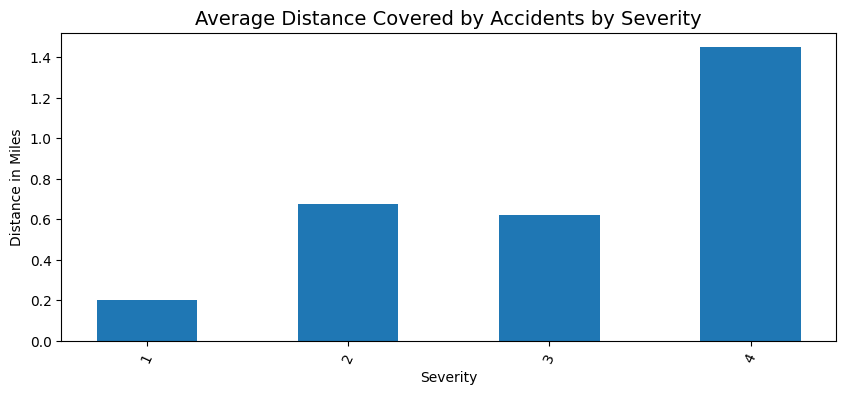

In [ ]:
# Plotting average distance covered by accidents grouped by severity
fig, ax = plt.subplots(figsize = (10,4))
width = 0.5
idx = np.asarray([1,2,3,4])
ax.bar(idx, [val for val in avg_distance_by_severity['Distance(mi)']], width=width)
ax.set_xticks(idx)
ax.set_xticklabels([1,2,3,4], rotation=65)
ax.set_xlabel('Severity')
ax.set_ylabel('Distance in Miles')
ax.set_title('Average Distance Covered by Accidents by Severity',
             fontsize = 14)

From this we can see that that there is not an exact direct relationship between severity and distance covered as one would imagine. The more serious the accidents are, the more disperesed the vehicles involved in the accident would be would be expected.

It is however interesting that the that we see the the biggest spike by a large margin between severity 3 & 4, the second largest spike between severtity 1 & 2, and not much of spike between severity 2 & 3. In fact, the average distance covered by severity 2 accidents is slightly larger than severtity 3 accidents.

This tells us that distance can be really telling factor to differentialte a very serious or very minor accident from average accidents in the severity 2 & 3. However, it gives us very little info in differentiating accidents of severity 2 & 3. We are predicting distance and severity don't have an absolute direct relationship because 2 big trucks colliding may not cover a lot of distance but the damage can be catastrophic.

Avg Distance Sev 1 = .21 mi

Avg Distance Sev 2 = .67 mi

Avg Distance Sev 3 = .62 mi

Avg Distance Sev 4 = 1.45 mi

Now we will use the raw_car_accidents_df to get the number of each accident severity level in each state.

<ipython-input-101-aaf146ed5a22>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Number of Accidents')

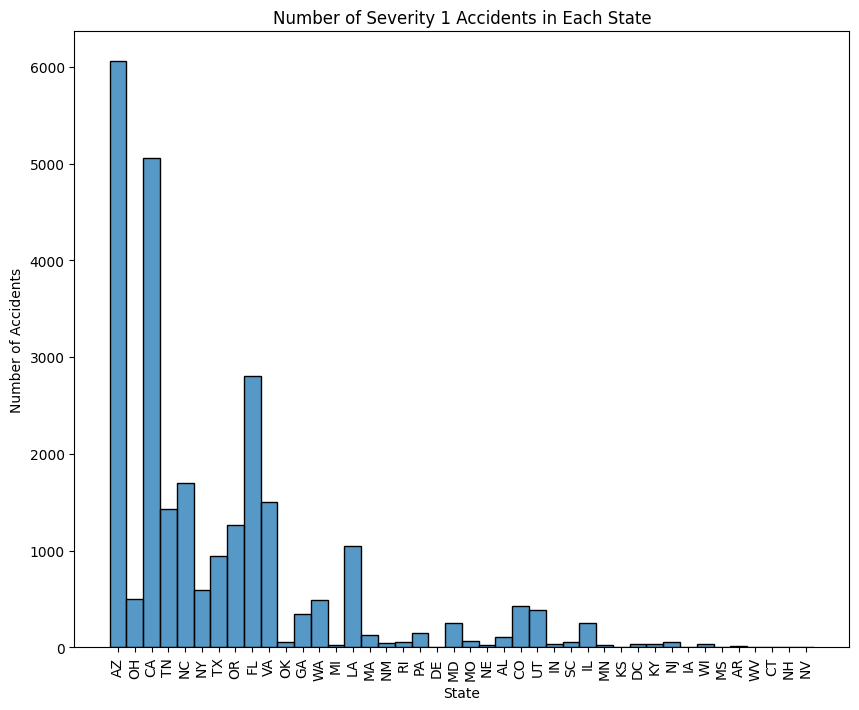

In [ ]:
# Plotting the number of severity 1 accidents per state
plt.figure(figsize = (10, 8))
ax = sns.histplot(x="State", data=raw_car_accidents_df[raw_car_accidents_df['Severity'] == 1])
plt.title('Number of Severity 1 Accidents in Each State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Accidents')

From this, we can see that for some reason there is a singificantly more amount of severity 1 accidents in Arizona and California than in any of the other states.

<ipython-input-102-d2b5feee8899>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Number of Accidents')

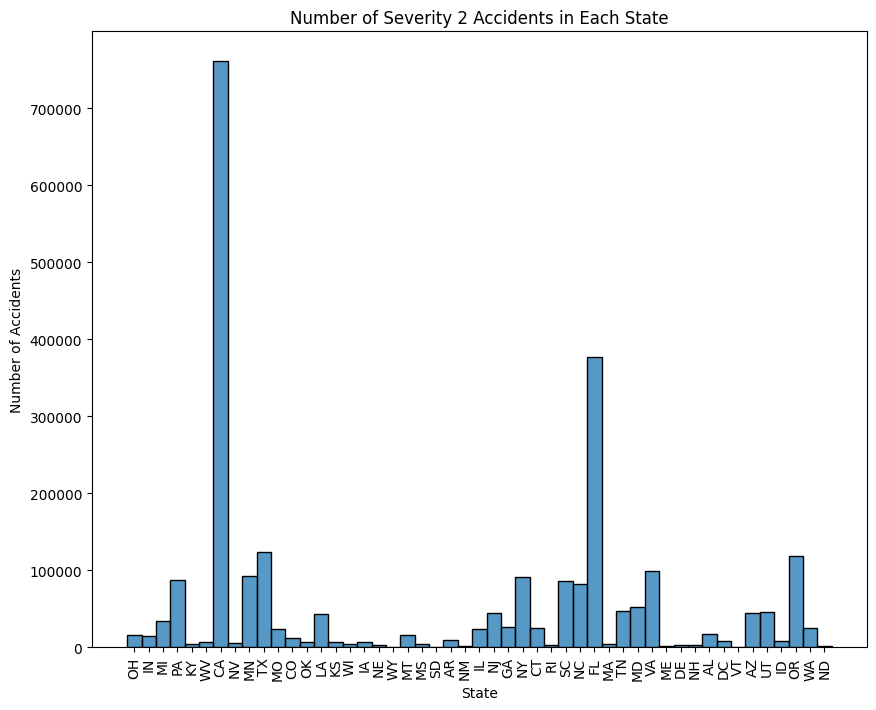

In [ ]:
# Plotting the number of severity 2 accidents per state
plt.figure(figsize = (10, 8))
ax = sns.histplot(x="State", data=raw_car_accidents_df[raw_car_accidents_df['Severity'] == 2])
plt.title('Number of Severity 2 Accidents in Each State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Accidents')

From this, we can see that for some reason there is a singificantly more amount of severity 2 accidents in California and Florida than in any of the other states.

<ipython-input-103-79e462a74295>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Number of Accidents')

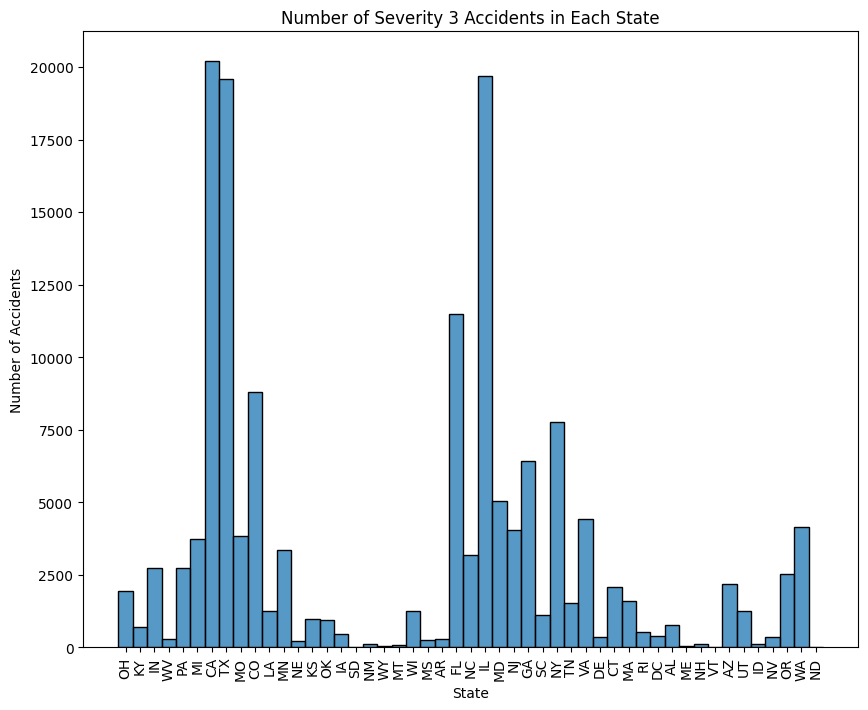

In [ ]:
# Plotting the number of severity 3 accidents per state
plt.figure(figsize = (10, 8))
ax = sns.histplot(x="State", data=raw_car_accidents_df[raw_car_accidents_df['Severity'] == 3])
plt.title('Number of Severity 3 Accidents in Each State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Accidents')

From this, we can see that there is more of an even distribution of severity 3 accidents per state than severity 1 or 2.

<ipython-input-104-9a90f172fe57>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Number of Accidents')

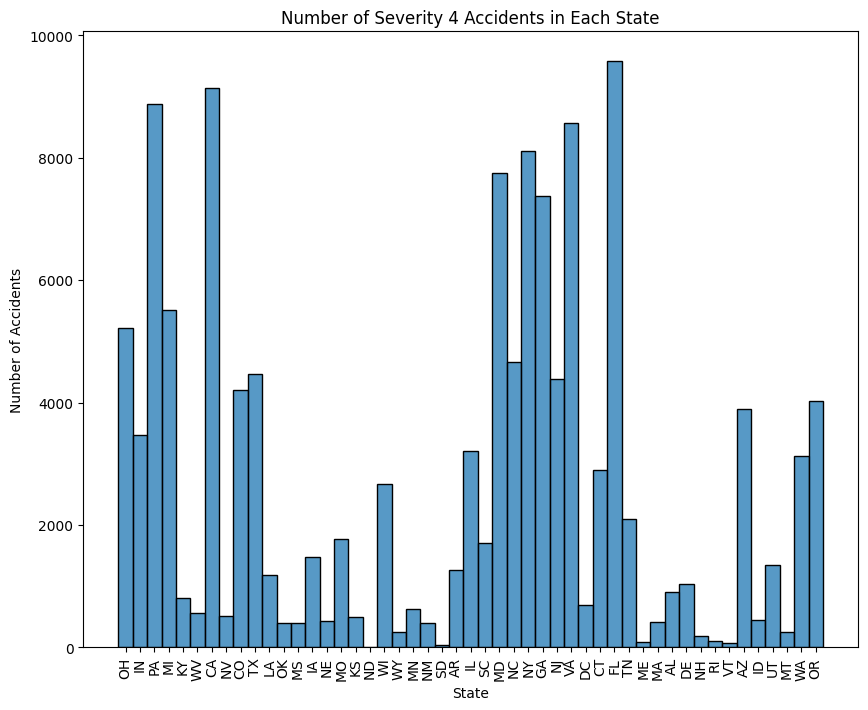

In [ ]:
# # Plotting the number of severity 4 accidents per state
plt.figure(figsize = (10, 8))
ax = sns.histplot(x="State", data=raw_car_accidents_df[raw_car_accidents_df['Severity'] == 4])
plt.title('Number of Severity 4 Accidents in Each State')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Accidents')

From this graph we can also see that there is a more balanced amount of severity 4 accidents in all states as compared to severity 1 and 2.

Now let's find the most accident ridden cities.

In [ ]:
# Finding number of accidents in each city
accidencts_by_city = raw_car_accidents_df.City.value_counts()
accidencts_by_city

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

Text(0.5, 1.0, 'Top 15 Cities with Most Accidents')

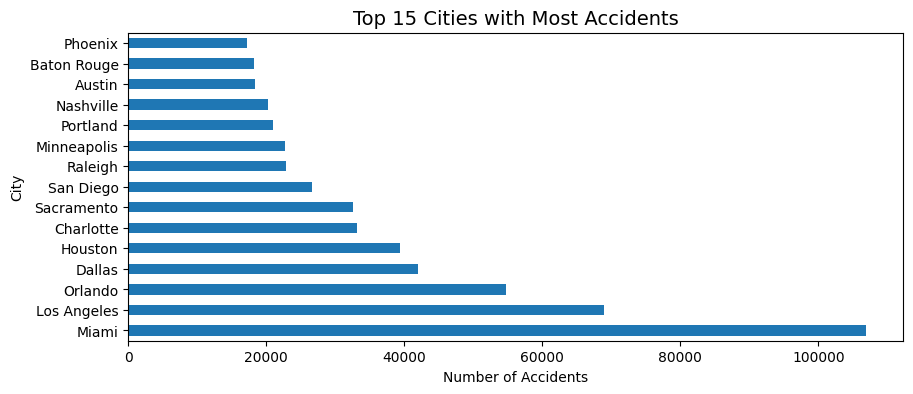

In [ ]:
# Plotting the top 15 cities
fix, ax = plt.subplots(figsize=(10, 4))
accidencts_by_city[:15].plot(kind='barh')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('City')
ax.set_title('Top 15 Cities with Most Accidents',fontsize = 14)

From the plot of the top 15 cities with the most accidents, we can see that there is a lot of accidents in cities in Florida (Miami and Orlando), California (LA, Sacramento, San Diego, Jacksonville), Texas (Houston, Dallas, Austin), and North Carolina (Charlotte, Raleigh).

## Time EDA


In this section of the EDA we will be looking for metrics on the time columns of the data set. This will allow us to look at some of the patterns/trends in the data with regards to times and durations of accidents depending on the severity.

[Text(0.5, 1.0, 'Histogram of Start Times of Accidents'),
 Text(0.5, 0, 'Start Time'),
 Text(0, 0.5, 'Frequency')]

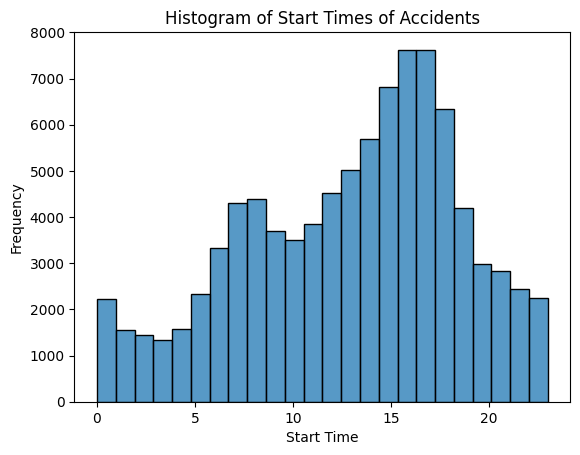

In [ ]:
# Finding the most common times of the day for an accident to start
s = sns.histplot(car_accidents_df.Start_Time.dt.hour, bins=24)
s.set(title="Histogram of Start Times of Accidents", xlabel="Start Time", ylabel="Frequency")

From the histogram above, we can see that there are two main peaks. The first one is smaller and is between 6am to 9am. The second one is larger and is between 3pm and 6pm. These are the most common times where rush hour occurs because people are driving to and from work in the mornings and evenings, and thus leads to more accidents.

## Location EDA


Now let's use our preprocessed dataframe car_accidents_df to view the spread of car accidents in the US. We opted to use the preprocessed data because seeing a million markers on a single map is hard for viewers to understand and also takes lots of memory to run. We believe a plot of 23K per severity level will deliver a suffecient message.

In [ ]:
sample_1 = car_accidents_df[car_accidents_df['Severity'] == 1]
fig = go.Figure(data=go.Scattergeo(
        lon = sample_1['Start_Lng'],
        lat = sample_1['Start_Lat'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Car Accidents of Severity 1 in the USA',
        geo_scope='usa',
    )
fig.show()

This may be the most interesting plot. This shows that severity 1 accidents mainly occur on coastal states. There are very few in the center of America.

In [ ]:
sample_2 = car_accidents_df[car_accidents_df['Severity'] == 2]
fig = go.Figure(data=go.Scattergeo(
        lon = sample_2['Start_Lng'],
        lat = sample_2['Start_Lat'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Car Accidents of Severity 2 in the USA',
        geo_scope='usa',
    )
fig.show()

While the severity 2 accidents appear more spreadout through the US, there is a spike in density among the West and East coasts specifically again like with severity 1 accidents.

In [ ]:
sample_3 = car_accidents_df[car_accidents_df['Severity'] == 3]
fig = go.Figure(data=go.Scattergeo(
        lon = sample_3['Start_Lng'],
        lat = sample_3['Start_Lat'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Car Accidents of Severity 3 in the USA',
        geo_scope='usa',
    )
fig.show()

The distribution of accidents of severity level 3 seems to be much more spread out than those of severity 2. There are many more individual clusters. Could this suggest that location in scope of the United States is much more of a factor for Severity 2 accidents than Severity 3 accidents?

In [ ]:
sample_4 = car_accidents_df[car_accidents_df['Severity'] == 4]
fig = go.Figure(data=go.Scattergeo(
        lon = sample_4['Start_Lng'],
        lat = sample_4['Start_Lat'],
        mode = 'markers',
        ))
fig.update_layout(
        title = 'Car Accidents of Severity 4 in the USA',
        geo_scope='usa',
    )
fig.show()

There is a more consistent covering of car accidents of severity 4 on the eastern part of the United States than the western region.

##Description EDA

We will now use our preprocessed dataframe car_accidents_df to view the spread of the description of car accidents in the US. We will do this by using the nltk library and creating stopwords, tokenizing the words and then generating a word cloud.

In [ ]:
# We've imported the nltk library and created the stopwords set
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Tokenized_content function that tokenizes and flattens

def tokenized_content(content):
  tokens = nltk.word_tokenize(content)
  tokens = [sub for sub in tokens if sub.isalpha()]
  tokens = map(lambda x: x.lower(), tokens)
  tokens = [word for word in tokens if word not in stopwords]
  return tokens

In [ ]:
# Calling our tokenizing function on the Description column
top_tokens_list = list(map(tokenized_content, car_accidents_df['Description']))
top_tokens = [item for sublist in top_tokens_list for item in sublist]

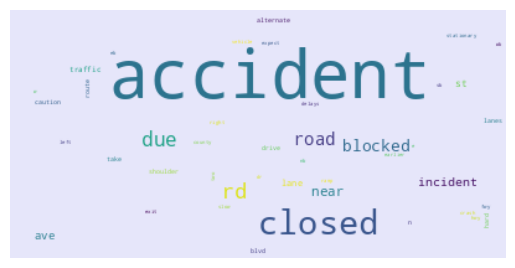

In [ ]:
# Generating word cloud
from collections import Counter
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lavender', stopwords=stopwords, relative_scaling=1).generate_from_frequencies(Counter(top_tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The biggest words in this word cloud are accident, incident, rd , near, and closed. Some these words are expected in an accident report and therefore does not give us much information. Let's try not considering words such as accident, incident, near, and different ways to describe a street.

In [ ]:
# Ignoring some words that were exepcted in accident reports
ignored_words = ['accident', 'incident', 'blvd', 'ave' , 'dr' , 'st', 'pkwy', 'pl', 'park', 'road', 'rd', 'drive']
skip = stopwords.union(ignored_words)
stpwrds = nltk.corpus.stopwords.words('english')
stpwrds.extend(ignored_words)

In [ ]:
# Tokenized_content function that tokenizes and flattens

def tokenized_content_custom_stopwords(content):
  tokens = nltk.word_tokenize(content)
  tokens = [sub for sub in tokens if sub.isalpha()]
  tokens = map(lambda x: x.lower(), tokens)
  tokens = [word for word in tokens if word not in stpwrds]
  return tokens

In [ ]:
# Calling our tokenizing function on the Description column
top_tokens_list = list(map(tokenized_content_custom_stopwords, car_accidents_df['Description']))
top_tokens = [item for sublist in top_tokens_list for item in sublist]

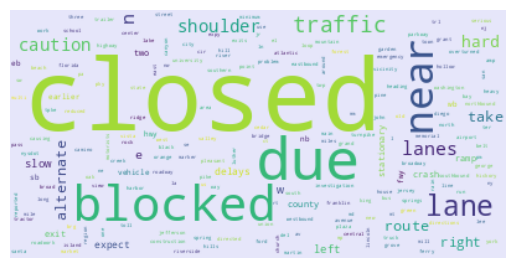

In [ ]:
# Generating word cloud
wordcloud = WordCloud(background_color = 'lavender', stopwords=stpwrds, relative_scaling=1).generate_from_frequencies(Counter(top_tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can make a few conclusions from the biggest words in this word cloud.

1. "Closed" & "Blocked" : An important part of an accident report is to reveal the status of the effected area including the access that drivers have on certain lanes, intersections, etc

2. "Near", "due": An accident report needs to describe the surrounding of where an accident occurred.  Was it near a junction, intersection, roundabout, exit, etc.

3. "Lane", "lanes", "route" , "alternate" , "shoulder":
A report describes alternate means of travel for travel that drivers must use because of accidents

## Weather EDA

In this last section of the EDA, we will be looking for metrics on the weather columns of the data set. This will allow us to look at some of the patterns/trends in the data with regards to what the weather was like when accidents of different severity levels occurred. We will be using Pandas SQL to do this part of the EDA.

In [ ]:
# Finding the proportion of weather conditions during accidents
weather_ratio_query = """
                      WITH percents AS (
                        SELECT Weather_Condition, count(*) * 100.0 / sum(count(*)) over() AS weather_counts
                        FROM car_accidents_df
                        GROUP BY Weather_Condition)
                      SELECT *
                      FROM percents
                      WHERE weather_counts > 1.5
                      """

weather_ratio_df = ps.sqldf(weather_ratio_query, locals())

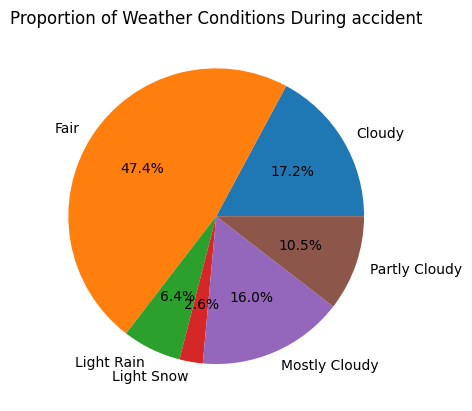

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Plotting the data found in weather_ratio_df
plt.pie(weather_ratio_df['weather_counts'], labels=weather_ratio_df['Weather_Condition'], autopct='%1.1f%%')
plt.title('Proportion of Weather Conditions During accident')
plt.figure(figsize = (15, 15))
plt.show()

From this pie chart, we can see that around half of the accidents have happened in "fair" weather conditions while a bit more than half happen during some sort of "unfair" weather conditinos. This is similar to what we predicted that more accidents would occur during unsafe weather conditions rather than fair weather conditions.

In [ ]:
# Finding the visibility (in miles) during accidents
visibility_ratio_query = """
                         WITH percents AS (
                           SELECT [Visibility(mi)], count(*) * 100.0 / sum(count(*)) over() AS visibility_percent
                           FROM car_accidents_df
                           GROUP BY [Visibility(mi)])
                         SELECT *
                         FROM percents
                         WHERE visibility_percent > 1.8
                         """

visibility_ratio_df = ps.sqldf(visibility_ratio_query, locals())

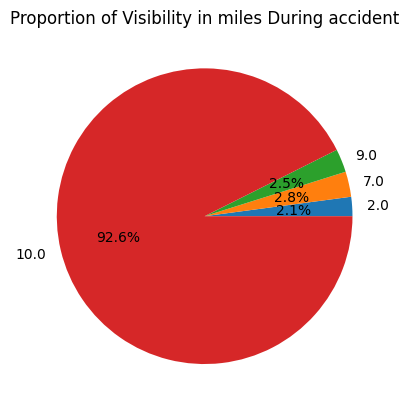

In [ ]:
# Plotting the data found in visibility_ratio_df
plt.pie(visibility_ratio_df['visibility_percent'], labels=visibility_ratio_df['Visibility(mi)'], autopct='%1.1f%%')
plt.title('Proportion of Visibility in miles During accident')
plt.show()

From this pie chart, we can see that most accidents happen in good conditions with visibility at 10 miles. When the visibility was lower, there were actually very few accidents that occurred. This pie charts tell us that perhaps weather doesn't have as much of an impact on the probability of accidents as we had initially thought.

In [ ]:
# Finding the temperature (in F) during accidents
temp_query = """
              SELECT "Warm" AS temp_group , COUNT(*) AS count
              FROM car_accidents_df
              WHERE [Temperature(F)] >= 58
              UNION
              SELECT "Cold" AS temp_group, COUNT(*) AS count
              FROM car_accidents_df
              WHERE [Temperature(F)] < 58
              """
temp_ratio_df = ps.sqldf(temp_query, locals())

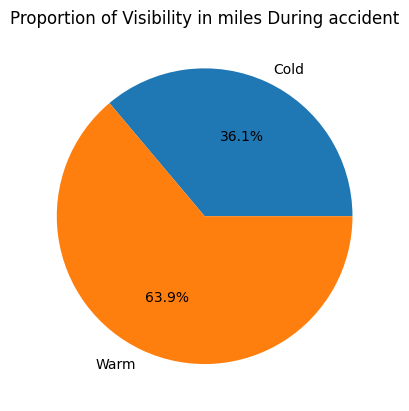

In [ ]:
# Plotting the data found in temp_ratio_df
plt.pie(temp_ratio_df['count'], labels=temp_ratio_df['temp_group'], autopct='%1.1f%%')
plt.title('Proportion of Visibility in miles During accident')
plt.show()

From this pie chart, we can see that more accidents seem to occur in warmer areas. Our guess is that when it is warmer people will want to travel more which requires being on the road. Therefore with more vehicles on the road, the likelihood of accidents increases.

In [ ]:
# Finding the pressure during accidents

car_accidents_df = car_accidents_df.astype({'Pressure(in)':'double'})
pressure_query = """
                  SELECT "High Pressure" AS pressure_group , COUNT(*) AS count
                  FROM car_accidents_df
                  WHERE [Pressure(in)] > 29.92
                  UNION
                  SELECT "Low Pressure" AS pressure_group, COUNT(*) AS count
                  FROM car_accidents_df
                  WHERE [Pressure(in)] < 29.92
                  """
pressure_ratio_df = ps.sqldf(pressure_query, locals())

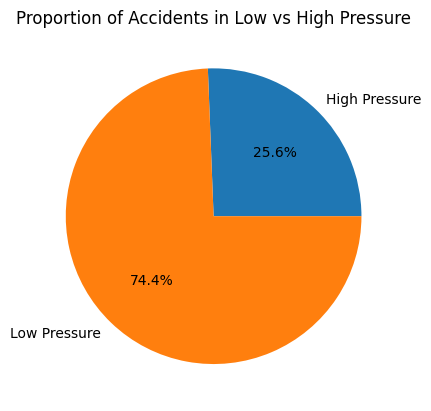

In [ ]:
# Plotting the data found in pressure_ratio_df
plt.pie(pressure_ratio_df['count'], labels=pressure_ratio_df['pressure_group'], autopct='%1.1f%%')
plt.title('Proportion of Accidents in Low vs High Pressure')
plt.show()

From this final pie chart, we can see around 75% of accidents occurred in low-pressure situations. We know that high-pressure systems generally result in clearer skies and fair weather, while low-pressure systems can bring clouds and precipitation, so this pie chart seems to reconfirm the discoveries found in the first pie chart showing that a bit more than half of the accidents occurred during "unfair" weather.

# Predictions


We will now use the sklearn library to run different models to predict the severity of the accidents. We will run Logistic Regression, K-Nearest-Neighbors, Decision Trees, and Random Forests.

In [ ]:
# import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn import metrics

### Train-test split

Because logistic regression will just predict a 1 or 2 and there are 4 severity levels, we will group by severity and make a new column called "Grouped Severity" that groups severity levels of 1 and 2 together and 3 and 3 together.

In [ ]:
# making new column to group severity (1/2) and (3/4) for logistic regression
def group_severity(severe):
  if (severe == 1) or (severe == 2):
    return 1
  elif (severe == 3) or (severe == 4):
    return 2

car_accidents_df['Grouped Severity'] = car_accidents_df['Severity'].apply(group_severity)

We will now split the data into test and training sets to use in our different models.

First, we will use the Pandas get_dummies() function to get the encodings for this dataset. Then, we will split the data into test and training sets using the target variable as "Grouped Severity" that we will use in the Logistic Regression model.

In [ ]:
# train test split for Grouped Severity
feature_list_gs = ['Grouped Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)', 'Side', 'Timezone',
                'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
                'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour', 'Weekday']
temp_gs = car_accidents_df[feature_list_gs]
encoded_car_accidents_df_gs = pd.get_dummies(temp_gs)

target = 'Grouped Severity'
# Create arrays for the features and the response variable
y_gs = encoded_car_accidents_df_gs.dropna()[target]
X_gs = encoded_car_accidents_df_gs.drop(target, axis=1)
X_gs = X_gs.dropna()

# Split the data set into training and testing data sets
X_train_gs, X_test_gs, y_train_gs, y_test_gs = train_test_split(X_gs, y_gs, test_size=0.2, random_state=42)

We will now use the Pandas get_dummies() function to get the encodings for this dataset and then split the data into test and training sets using the target variable as "Severity" that we will use in the rest of the models.

In [ ]:
# train test split for Severity
feature_list_s = ['Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)', 'Side', 'Timezone',
                'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
                'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour', 'Weekday']
temp_s = car_accidents_df[feature_list_s]
encoded_car_accidents_df_s = pd.get_dummies(temp_s)

target = 'Severity'
# Create arrays for the features and the response variable
y_s = encoded_car_accidents_df_s.dropna()[target]
X_s = encoded_car_accidents_df_s.drop(target, axis=1)
X_s = X_s.dropna()

# Split the data set into training and testing data sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

This dictionary will hold all the accuracy scores for each model that we can use for comparison at the end.

In [ ]:
# This will hold all the accuracy scores for each model
accuracy_dict = {}

### Logistic Regression

We will first perform logistic regression on this dataset using sklearn's logistic regression and the target variable as "Grouped Severity". We chose logistic regression as a model for this problem because it is a reliable binary classificaiton model that works well on datasets such as the one we have. Car accidents of severity 1 and 2 will be in one group of low severity, whereas accidents of level 3 and 4 are higher severity.

In [ ]:
# create an instance of the logistic regression model
logreg = LogisticRegression()

# train the model on the training data
logreg.fit(X_train_gs, y_train_gs)

# make predictions on the testing data
y_pred_log_reg = logreg.predict(X_test_gs)

# evaluate the model's accuracy on the testing data
acc_log_reg = accuracy_score(y_test_gs, y_pred_log_reg)

# append to the accuracy dict
accuracy_dict['log reg'] = acc_log_reg

print("[Logistic regression accuracy_score: {:.3f}.".format(acc_log_reg))

[Logistic regression accuracy_score: 0.693.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



We will create a heatmap of the confusion matrix generated from this logistic regression model.

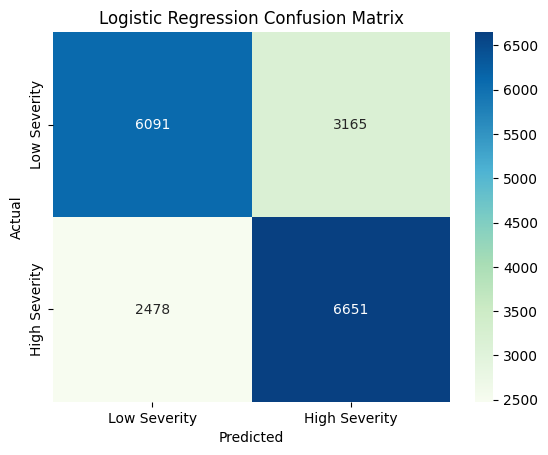

<Figure size 800x400 with 0 Axes>

In [ ]:

ax = plt.axes()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_gs, y_pred_log_reg)), annot = True, cmap = 'GnBu', fmt = "g", ax = ax)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.xaxis.set_ticklabels(['Low Severity', 'High Severity']); ax.yaxis.set_ticklabels(['Low Severity', 'High Severity']);
plt.figure(figsize=(8, 4))
plt.show()






From this, we see that our most common mistake was predicting low  severity accidents (1 & 2) were high severity accidents.

 However, since we grouped types 1 and 2 severities as 1 and types 3 and 4 as 2 for this model, this result doesn't give us much insight into which of the 4 severity levels gets more confused in the model.



### K-Nearest-Neighbors

We will now run KNN with the severity not grouped.

We chose to do KNN classification because  a lot domain knowlege is known about this topic. Therefore we believe the distance function can be used as a good proxy for grouping. We do not need the model to human readable so KNN suffices.


Text(0, 0.5, 'Error Rate')

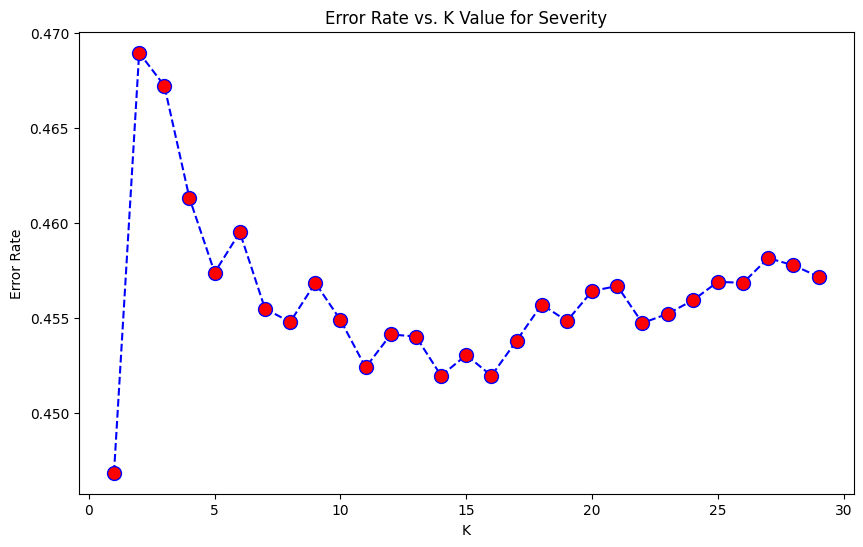

In [ ]:
k_values = list(range(1, 30))

# create an empty list to store the accuracy scores for each K value
error_rate_s = []

# loop through each K value and train a KNN model
for k in k_values:
  knn_s = KNeighborsClassifier(n_neighbors=k)
  knn_s.fit(X_train_s, y_train_s)
  pred_i_s = knn_s.predict(X_test_s)
  error_rate_s.append(np.mean(pred_i_s != y_test_s))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate_s, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value for Severity")
plt.xlabel('K')
plt.ylabel('Error Rate')

16 neighbors is about where the error rate is minimum. So we will use this parameter for classification.

In [ ]:
# create an instance of the KNN model
knn_s = KNeighborsClassifier(n_neighbors=16)

# train the model on the training data
knn_s.fit(X_train_s, y_train_s)

# make predictions on the testing data
y_pred_knn_s = knn_s.predict(X_test_s)

# evaluate the model's accuracy on the testing data
acc_knn_s = accuracy_score(y_test_s, y_pred_knn_s)

# append to the accuracy list
accuracy_dict['knn severity'] = acc_knn_s

print('Accuracy of the KNN model with severity: {:.2f}%'.format(acc_knn_s * 100))

Accuracy of the KNN model with severity: 54.81%


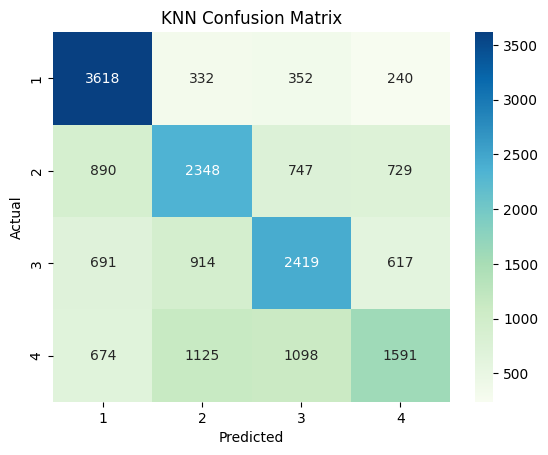

<Figure size 800x400 with 0 Axes>

In [ ]:
ax = plt.axes()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_s, y_pred_knn_s)), annot = True, cmap = 'GnBu', fmt = "g", ax = ax)
ax.set_title('KNN Confusion Matrix')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.xaxis.set_ticklabels(['1', '2', '3', '4']); ax.yaxis.set_ticklabels(['1', '2', '3', '4']);
plt.figure(figsize=(8, 4))
plt.show()

According to the confusion matrix, Severity 1 accidents were the easiest to predict correclty followed by Severity 3, 2 , and 4

Severity 1 = 80% accuracy

Severity 2 = 50% accuracy

Severity 3 = 52% accuracy

Severity 4 = 35% accuracy


### Decision Trees

We will run Decision Trees on the severity not grouped as well.

Decision Trees are easier to understand than Random Forests and thus are easier to explain to a non data-scientist or a person without a technical background. They are a good choice of model if you are ok trading a lower accuracy for model transparency and simplicity.







We will first find the optimal max_depth parameter value:

In [ ]:
# finding best value for max_depth
best_max_depth = 0
max_acc_knn_clf = 0
for i in range(1, 30):
  clf_s = DecisionTreeClassifier(max_depth = i, random_state = 42)
  clf_s = clf_s.fit(X_train_s, y_train_s)
  y_pred_clf_s = clf_s.predict(X_test_s)
  acc_knn_clf = accuracy_score(y_test_s, y_pred_clf_s)
  if acc_knn_clf > max_acc_knn_clf:
    best_max_depth = i
    max_acc_knn_clf = acc_knn_clf

print('The optimal max_depth is ' + str(best_max_depth))

The optimal max_depth is 13


In [ ]:
# create an instance of the Decision Tree classifer model
clf_s = DecisionTreeClassifier(max_depth = best_max_depth, random_state = 42)

# train the model on the training data
clf_s = clf_s.fit(X_train_s, y_train_s)

# make predictions on the testing data
y_pred_clf_s = clf_s.predict(X_test_s)

# evaluate the model's accuracy on the testing data
acc_knn_clf_s = accuracy_score(y_test_s, y_pred_clf_s)

# append to the accuracy list
accuracy_dict['decision tree s'] = acc_knn_clf_s

print('Accuracy of the Decision tree model severity: {:.2f}%'.format(acc_knn_clf_s * 100))

Accuracy of the Decision tree model severity: 68.20%


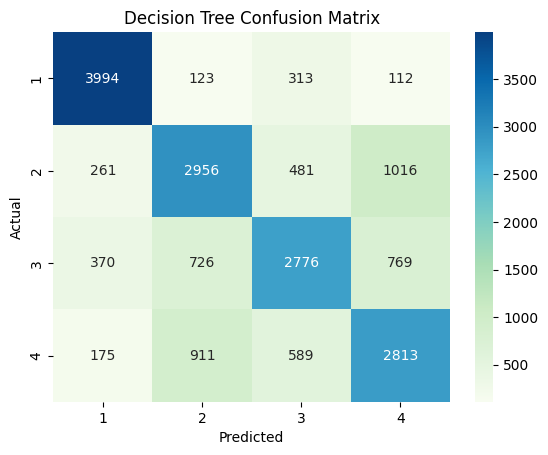

<Figure size 800x400 with 0 Axes>

In [ ]:

ax = plt.axes()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_s, y_pred_clf_s)), annot = True, cmap = 'GnBu', fmt = "g", ax = ax)
ax.set_title('Decision Tree Confusion Matrix')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.xaxis.set_ticklabels(['1', '2', '3', '4']); ax.yaxis.set_ticklabels(['1', '2', '3', '4']);
plt.figure(figsize=(8, 4))
plt.show()

According to the confusion matrix, Severity 1 accidents were the easiest to predict correclty followed by Severity 2 & 4 , and lastly 3

Severity 1 = 88% accuracy

Severity 2 = 63% accuracy

Severity 3 = 60% accuracy

Severity 4 = 63% accuracy

### Random Forest

We will run Random Forest on the severity not grouped as well.

As explained earlier, when accuracy is the priority of the model, not transparency, random forests may be preferrable to Decision trees. We beleive that when it comes to saving lives from potentially lethal car accidents, accuracy is paramount. So we would use Random forests in practice.

In [ ]:
# create an instance of the Random Forest classifer model
rf_s = RandomForestClassifier(n_estimators=40, max_depth=19, random_state=42)

# train the model on the training data
rf_s = rf_s.fit(X_train_s, y_train_s)

# make predictions on the testing data
y_pred_rf_s = rf_s.predict(X_test_s)

# evaluate the model's accuracy on the testing data
acc_knn_rf = accuracy_score(y_test_s, y_pred_rf_s)

# append to the accuracy list
accuracy_dict['random forest'] = acc_knn_rf

print('Accuracy of the Random Forest model: {:.2f}%'.format(acc_knn_rf * 100))

Accuracy of the Random Forest model: 68.45%


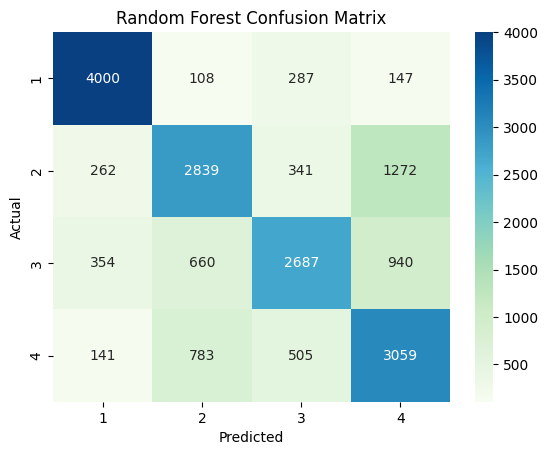

<Figure size 800x400 with 0 Axes>

In [ ]:

ax = plt.axes()
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_s, y_pred_rf_s)), annot = True, cmap = 'GnBu', fmt = "g", ax = ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.xaxis.set_ticklabels(['1', '2', '3', '4']); ax.yaxis.set_ticklabels(['1', '2', '3', '4']);
plt.figure(figsize=(8, 4))
plt.show()

According to the confusion matrix, Severity 1 accidents were the easiest to predict correclty followed by Severity 4, 2 , and lastly 3

Severity 1 = 88% accuracy

Severity 2 = 60% accuracy

Severity 3 = 58% accuracy

Severity 4 = 68% accuracy

### Comparing The Models

We will now look at the accuracy scores for each of the models we made and compare them.

In [ ]:
sorted(accuracy_dict.items(), key=lambda x:x[1], reverse=True)

[('log reg', 0.6930649986401958),
 ('random forest', 0.6845254283383193),
 ('decision tree s', 0.682023388632037),
 ('knn severity', 0.5480554800108784)]

Thus, we can see that logistic regression provided the highest accuracy score. However, we cannot use this to classify 4 groups.

So the best model to use in practice was Random Forest to predict the severity of car accidents. An added bonus for the random forest model is that predicts severity 4 accidents with the highest accuracy. And it could be said that it is most to predict these correctly than any other level. We want to ensure enough polic and ambulances are sent to these accident scenes.




 Now the resources required can be allocated to tend to car accident victims.